# Linear Regression

## Import Dataset

In [1]:
# from google.colab import files
# files.upload()

## Import Libraries

In [2]:
# import Library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

## Dataset Visualization

In [3]:
# Import Dataset
dataset = pd.read_excel('real-estate.xlsx')

In [4]:
print(dataset)

      No  X1 transaction date  ...  X6 longitude  Y house price of unit area
0      1          2012.916667  ...     121.54024                        37.9
1      2          2012.916667  ...     121.53951                        42.2
2      3          2013.583333  ...     121.54391                        47.3
3      4          2013.500000  ...     121.54391                        54.8
4      5          2012.833333  ...     121.54245                        43.1
..   ...                  ...  ...           ...                         ...
409  410          2013.000000  ...     121.50381                        15.4
410  411          2012.666667  ...     121.54310                        50.0
411  412          2013.250000  ...     121.53986                        40.6
412  413          2013.000000  ...     121.54067                        52.5
413  414          2013.500000  ...     121.54310                        63.9

[414 rows x 8 columns]


In [5]:
dataset.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
dataset.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [7]:
dataset.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Splitting of Dataset

In [9]:
X = dataset.iloc[:, 2].values.reshape(-1, 1)
y = dataset.iloc[:, -1:].values
print(X.shape)
print(y.shape)

(414, 1)
(414, 1)


Text(0.5, 1.0, 'Price Vs Age!!')

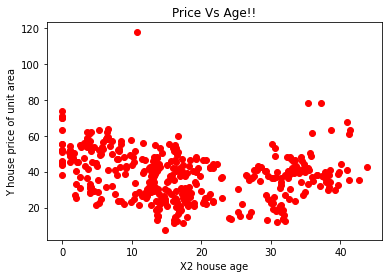

In [10]:
plt.scatter(X, y, c='r')
plt.xlabel(dataset.columns[2])
plt.ylabel(dataset.columns[7])
plt.title("Price Vs Age!!")

In [11]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0) # 75% split
print(X_train.shape)
print(X_test.shape)

(310, 1)
(104, 1)


## Normalization of Dataset

In [12]:
# normalization of input training data
m = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print(m.shape)
print(std.shape)

(1,)
(1,)


In [13]:
X_train = (X_train-m) / std 

In [14]:
# normalization of testing data
X_test = (X_test-m) / std 

# Calculating Bias and Weigth Vector

In [15]:
n = X_train.shape[0]
X_train_sum = np.sum(X_train)
y_train_sum = np.sum(y_train)
X_train_sq = np.sum(X_train * X_train)
y_train_sq = np.sum(y_train * y_train)
xy_sum = np.sum(X_train * y_train)

In [16]:
w1 = (y_train_sum * X_train_sq - X_train_sum * xy_sum) / (n * X_train_sq - X_train_sum**2) # bias vector
w2 = (X_train_sum * y_train_sum - n * xy_sum) / (X_train_sum**2 - n * X_train_sq) # weight vector
print("Wight vector:", w2)
print("Bias Vector:", w1)

Wight vector: -3.011859502762029
Bias Vector: 38.24032258064516


# Prediction using Testing Dataset

In [17]:
predict = w1 + w2 * X_test 

for i in range(X_test.shape[0]):
  print("Predicted:", predict[i], "Correct Label:", y_test[i])

Predicted: [40.15474324] Correct Label: [45.3]
Predicted: [36.50073015] Correct Label: [14.4]
Predicted: [33.70020916] Correct Label: [46.]
Predicted: [36.07398409] Correct Label: [15.6]
Predicted: [39.06120647] Correct Label: [50.2]
Predicted: [33.14010497] Correct Label: [38.1]
Predicted: [33.353478] Correct Label: [48.5]
Predicted: [33.62019428] Correct Label: [41.4]
Predicted: [40.10139998] Correct Label: [51.6]
Predicted: [38.31440088] Correct Label: [40.1]
Predicted: [39.35459439] Correct Label: [42.]
Predicted: [39.35459439] Correct Label: [42.4]
Predicted: [39.51462416] Correct Label: [28.5]
Predicted: [33.83356731] Correct Label: [39.1]
Predicted: [41.67502606] Correct Label: [53.7]
Predicted: [33.32680637] Correct Label: [36.8]
Predicted: [34.2069701] Correct Label: [40.6]
Predicted: [42.90192096] Correct Label: [55.2]
Predicted: [39.43460927] Correct Label: [39.3]
Predicted: [33.62019428] Correct Label: [44.3]
Predicted: [41.38163814] Correct Label: [53.5]
Predicted: [39.701

## Error Computation

In [18]:
error = y_test - predict
sq_err = np.square(error)
RMSE = np.sqrt(np.sum(sq_err))
print("RMSE:", RMSE)

RMSE: 130.40663662905462
